### Aiming to uncover the factors that  lead to employee attrition and answer the following questions:


          1. Show a breakdown of distance from home by job role and attrition.
          2. Compare average monthly income by education and attrition.

In [68]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in the CSV file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Show a breakdown of distance from home by job role and attrition


In [19]:
df1 = df[['Attrition', 'JobRole', 'DistanceFromHome', 'MonthlyIncome', 'Education' ]]
df1

,Attrition,JobRole,DistanceFromHome,MonthlyIncome,Education
0,Yes,Sales Executive,1,5993,2
1,No,Research Scientist,8,5130,1
2,Yes,Laboratory Technician,2,2090,2
3,No,Research Scientist,3,2909,4
4,No,Laboratory Technician,2,3468,1
...,...,...,...,...,...
1465,No,Laboratory Technician,23,2571,2
1466,No,Healthcare Representative,6,9991,1
1467,No,Manufacturing Director,4,6142,3
1468,No,Sales Executive,2,5390,3


In [21]:
df1.groupby(['DistanceFromHome', 'JobRole']).count().reset_index()

,DistanceFromHome,JobRole,Attrition,MonthlyIncome,Education
0,1,Healthcare Representative,23,23,23
1,1,Human Resources,9,9,9
2,1,Laboratory Technician,31,31,31
3,1,Manager,13,13,13
4,1,Manufacturing Director,24,24,24
...,...,...,...,...,...
219,29,Manager,4,4,4
220,29,Manufacturing Director,4,4,4
221,29,Research Scientist,4,4,4
222,29,Sales Executive,5,5,5


In [37]:
Attrited_yes = df1[['DistanceFromHome', 'JobRole','Attrition' ]][df['Attrition'] == 'Yes']
Attrited_yes.groupby(['DistanceFromHome','JobRole']).count().head(10)

Attrition
DistanceFromHome JobRole                             
1                Human Resources                    1
                 Laboratory Technician              4
                 Manufacturing Director             1
                 Research Scientist                 7
                 Sales Executive                    6
                 Sales Representative               7
2                Healthcare Representative          1
                 Human Resources                    1
                 Laboratory Technician             11
                 Manager                            3

In [32]:
Attrited_no = df1[['DistanceFromHome', 'JobRole','Attrition' ]][df['Attrition'] == 'No']
Attrited_no.groupby(['DistanceFromHome', 'JobRole',]).count().head(10)

Attrition
DistanceFromHome JobRole                             
1                Healthcare Representative         23
                 Human Resources                    8
                 Laboratory Technician             27
                 Manager                           13
                 Manufacturing Director            23
                 Research Director                 13
                 Research Scientist                40
                 Sales Executive                   33
                 Sales Representative               2
2                Healthcare Representative         14

In [38]:
df1.columns


Index(['Attrition', 'JobRole', 'DistanceFromHome', 'MonthlyIncome',
       'Education'],
      dtype='object')

In [82]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Text(0, 0.5, 'Distance From Home')

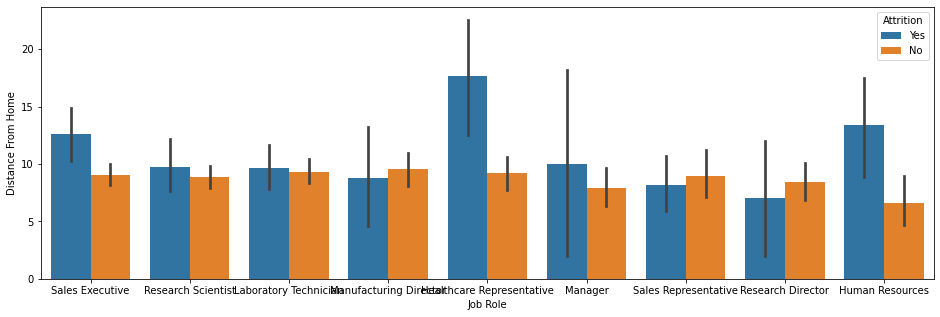

In [84]:
plt.figure(figsize=(16,5))
sns.barplot(x="JobRole", y="DistanceFromHome" ,hue="Attrition", data=df1,)
plt.xlabel("Job Role")
plt.ylabel("Distance From Home")

### Compare average monthly income by education and attrition.


In [65]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [64]:
df_monthlyincome = df1[['Attrition', 'MonthlyIncome', 'Education']]
df2 = df_monthlyincome.groupby(['Attrition','Education']).mean().reset_index()
df2

,Attrition,Education,MonthlyIncome
0,No,1,5926.129496
1,No,2,6586.058824
2,No,3,6882.919662
3,No,4,7087.814706
4,No,5,8559.906977
5,Yes,1,4360.161290
6,Yes,2,4282.545455
7,Yes,3,4770.242424
8,Yes,4,5335.155172
9,Yes,5,5850.200000


Text(0, 0.5, 'Average MonthlyIncome')

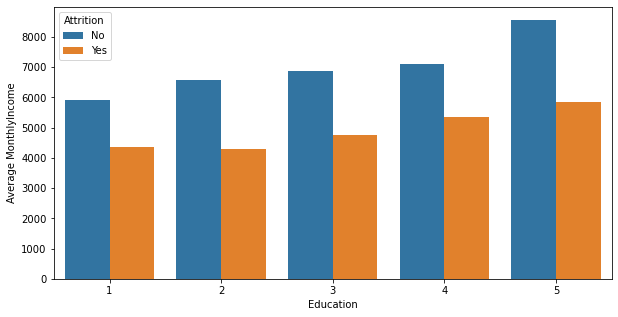

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x="Education", y="MonthlyIncome" ,hue="Attrition", data=df2)
plt.xlabel("Education")
plt.ylabel("Average MonthlyIncome")